170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5480 - accuracy: 0.4344 - val_loss: 1.2669 - val_accuracy: 0.5403
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1687 - accuracy: 0.5846 - val_loss: 1.1149 - val_accuracy: 0.6092
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0209 - accuracy: 0.6390 - val_loss: 1.0270 - val_accuracy: 0.6417
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9310 - accuracy: 0.6724 - val_loss: 0.9422 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8550 - accuracy: 0.7010 - val_loss: 0.9018 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7950 - accuracy: 0.7207 - val_loss: 0.9279 - val_accuracy: 0.6850
Epoch 7/10
1563/1563 [==============================] - 7

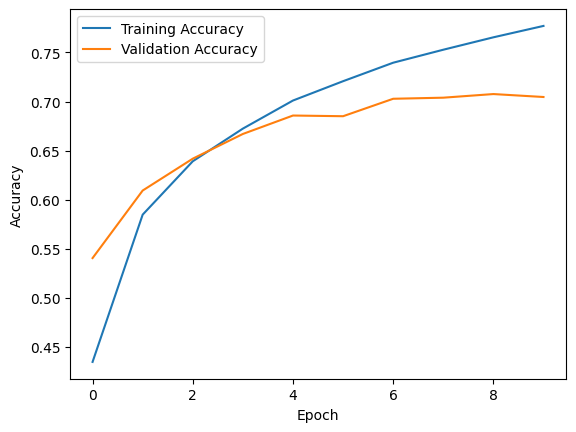

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Plot training accuracy and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
